In [ ]:
#  load the handwritten digits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA

digits = load_digits()
#print('\nDigits shape:', digits.data.shape)

#  Homework 7



1.  Repeat the non-noisy digits example using 5 components.  How much of the variance is explained?<br><br>


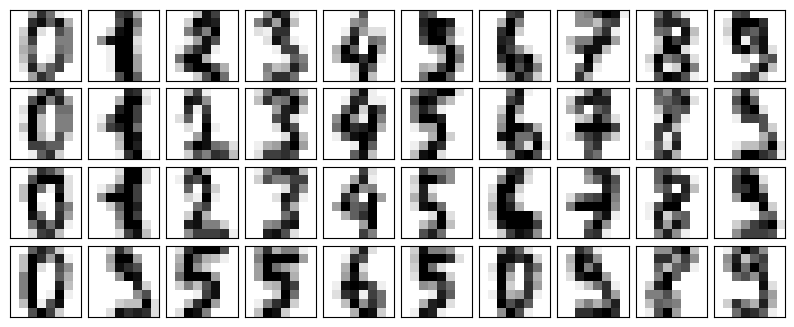

In [ ]:
#  show some digits
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)


Expained Variance Ratio: 0.54

Number of components: 5


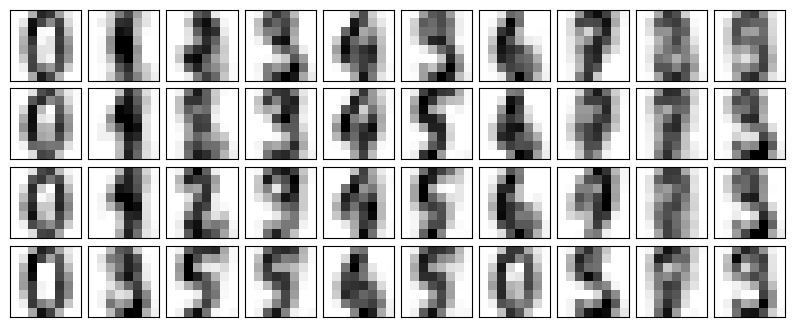

In [ ]:
#  check this
pca2 = PCA(n_components=5)
pca2.fit(digits.data)
print('\nExpained Variance Ratio:', round(sum(pca2.explained_variance_ratio_),2))

pca = PCA(round(sum(pca2.explained_variance_ratio_),2)).fit(digits.data)
print('\nNumber of components:', pca.n_components_)

components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

2.  Repeat the non-noisy digits example using 20 components.  How much of the variance is explained?<br><br>


Expained Variance Ratio: 0.89


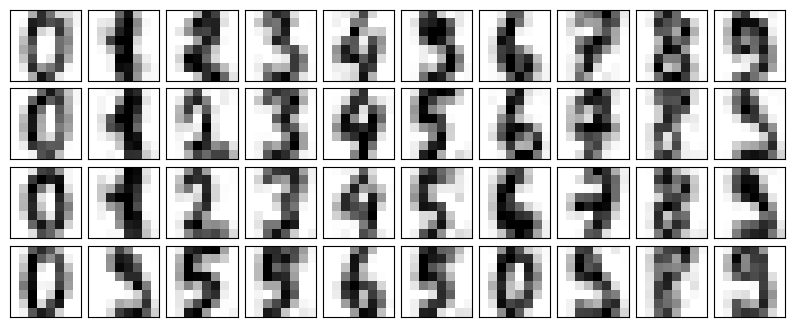

In [ ]:
#  check this
pca2 = PCA(n_components=20)
pca2.fit(digits.data)
print('\nExpained Variance Ratio:', round(sum(pca2.explained_variance_ratio_),2))

pca = PCA(round(sum(pca2.explained_variance_ratio_),2)).fit(digits.data)

components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

3.  Repeat the non-noisy digits example using 40 components.  How much of the variance is explained?<br><br>


Expained Variance Ratio: 0.99


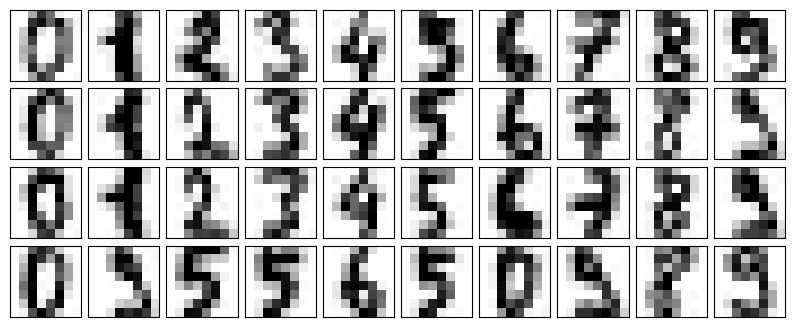

In [ ]:
#  check this
pca2 = PCA(n_components=40)
pca2.fit(digits.data)
print('\nExpained Variance Ratio:', round(sum(pca2.explained_variance_ratio_),2))

pca = PCA(round(sum(pca2.explained_variance_ratio_),2)).fit(digits.data)

components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

4.  Describe the non-noisy results that you obtain.<br><br>

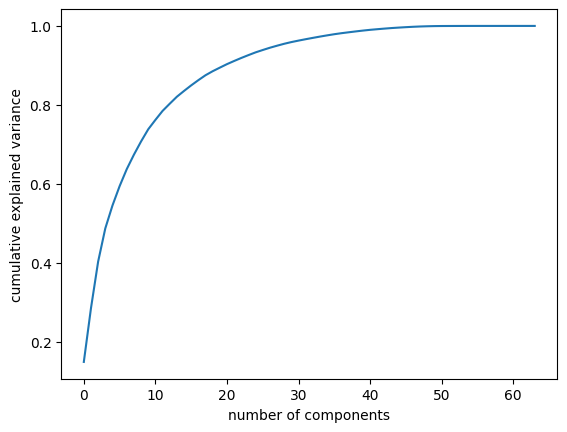

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_[0:40]))

[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430312 0.9031985  0.91116973 0.91884467 0.9260737
 0.93303259 0.9389934  0.94474955 0.94990113 0.95479652 0.9590854
 0.96282146 0.96635421 0.96972105 0.97300135 0.97608455 0.97902234
 0.98158823 0.98386565 0.98608843 0.98820273]


It seems that 90% of the variance can be explained by 20 out of 64 of the components of these 8x8 images of digits. As shown from the reconstructions of the images in question 1, where 5 components are used to reconstruct the digits from the non noisy data, it appears, 5 components can explain 54.496% of the variance, which aligns with the explained variance ratio of 0.54 that we found in question 1. It appears as we increase the number of components from 5 to 20, we see a large jump in visual clearity which aligns with the jump of explained variance from 0.54 to 0.89. But from 20 to 40 components we begin to see diminishing returns, where in the reconstructions of the digits using 20 components are relatively clear (0.89 of the variance can be explained from the 20 components vs 0.99 of the explained variance for 40 components. The notion of analyzing the principle components that explain the differences between the digits makes sense as the jump beween 20 to 40 components in the reconstructions does not lead to a large jump in visual acuity, which follows the graph above that shows the explained variance for N number of components.